In [370]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# Load the torch file
file_path = "weight_.model.layer3.0.conv1.pt"
data = torch.load(file_path)
print(data.shape)

torch.Size([256, 128, 3, 3])


In [371]:
reshaped_tensor = data.view(data.shape[0], -1).detach().cpu().numpy()
print("shape changed : ", reshaped_tensor.shape)

max_values = np.abs(np.max(reshaped_tensor, axis=1))
min_values = np.abs(np.min(reshaped_tensor, axis=1))

scale_array = np.maximum(max_values, min_values)

shape changed :  (256, 1152)


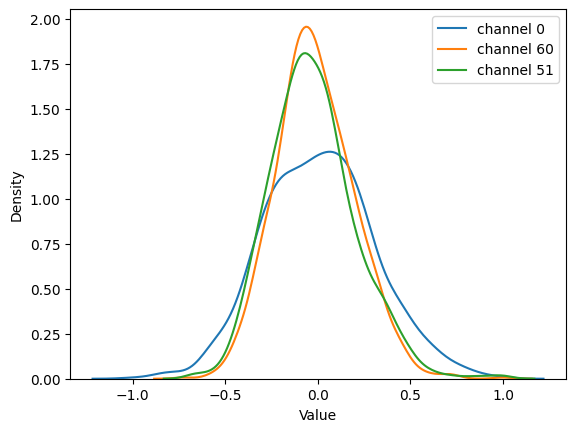

In [372]:
import seaborn as sns
scaled_array = reshaped_tensor / scale_array[:, np.newaxis]

draw_channel = [0, 60, 51]

for ch in draw_channel:
    sns.kdeplot(scaled_array[ch, :], label='channel {}'.format(ch))

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

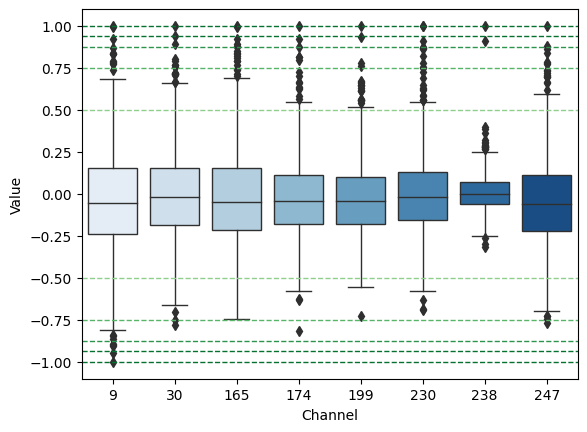

In [373]:
#Output channel-wise
oc_max_values = np.max(scaled_array, axis=1)
oc_min_values = np.min(scaled_array, axis=1)

oc_diff = oc_max_values - oc_min_values

oc_min_idx = np.argmin(oc_diff)
oc_max_idx = np.argmax(oc_diff)

random_indices = np.random.choice(scaled_array.shape[0], size=6, replace=False).tolist()
random_indices += [oc_min_idx, oc_max_idx]
random_indices.sort()

df_scaled_array = pd.DataFrame(scaled_array).transpose()
df_draw_channels = df_scaled_array[random_indices]

sns.boxplot(data=df_draw_channels, palette="Blues", linewidth=1)

palette = sns.color_palette("Greens")
#draw Horizontal
for i in range(5):
    delta = 1-2**-i
    if delta == 0:
        delta = 1
        i = 4
    plt.axhline(y=-delta, color=palette[i+1], linestyle='--', linewidth=1)
    plt.axhline(y=+delta, color=palette[i+1], linestyle='--', linewidth=1)

plt.xlabel('Channel')
plt.ylabel('Value')
plt.show()

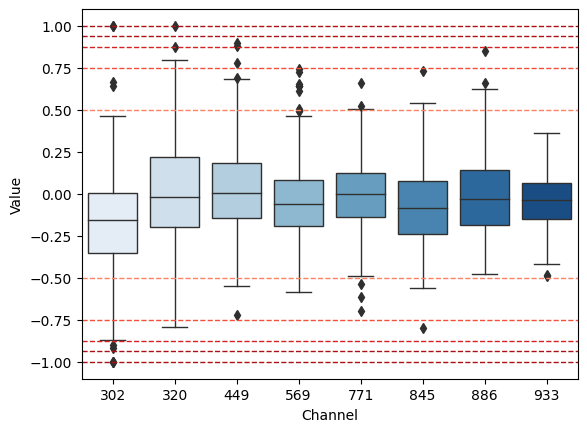

In [374]:

#Input channel-wise
ic_max_values = np.max(scaled_array, axis=0)
ic_min_values = np.min(scaled_array, axis=0)

ic_diff = ic_max_values - ic_min_values

min_idx = np.argmin(ic_diff)
max_idx = np.argmax(ic_diff)

random_indices = np.random.choice(scaled_array.shape[1], size=6, replace=False).tolist()
random_indices += [min_idx, max_idx]
random_indices.sort()

df_scaled_array = pd.DataFrame(scaled_array)
df_draw_channels = df_scaled_array[random_indices]
sns.boxplot(data=df_draw_channels, palette="Blues", linewidth=1)

palette = sns.color_palette("Reds")
#draw Horizontal
for i in range(5):
    delta = 1-2**-i
    if delta == 0:
        delta = 1
        i = 4
    plt.axhline(y=-delta, color=palette[i+1], linestyle='--', linewidth=1)
    plt.axhline(y=+delta, color=palette[i+1], linestyle='--', linewidth=1)

plt.xlabel('Channel')
plt.ylabel('Value')
plt.show()


In [383]:
from sklearn.cluster import KMeans



In [387]:
%%timeit
ic_max_values = np.max(scaled_array, axis=0)
ic_min_values = np.min(scaled_array, axis=0)
merged_array = np.stack((ic_max_values[:384], ic_min_values[:384]), axis=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(merged_array)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Print the cluster labels

17.4 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


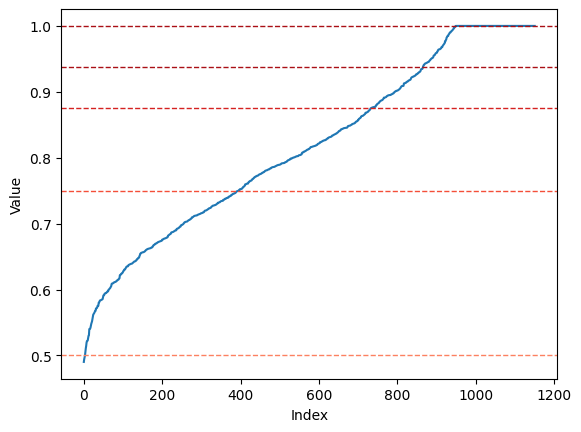

[0.7415027  0.785285   0.7030001  ... 0.60852134 0.8438862  0.7064144 ]


In [377]:
#Input channel-wise
ic_max_values = np.abs(np.max(scaled_array, axis=0))
ic_min_values = np.abs(np.min(scaled_array, axis=0))
ic_max_values = np.maximum(ic_max_values, ic_min_values)

sorted_values = np.sort(ic_max_values)
plt.plot(sorted_values)
plt.xlabel('Index')
plt.ylabel('Value')

palette = sns.color_palette("Reds")
#draw Horizontal
for i in range(5):
    delta = 1-2**-i
    if delta == 0:
        delta = 1
        i = 4
    plt.axhline(y=+delta, color=palette[i+1], linestyle='--', linewidth=1)


plt.show()

print(ic_max_values)